In [1]:
import pandas as pd
import numpy as np

In [21]:
av = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Null values

In [14]:
av.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

It seems there are a lot of Null values in the data.

In [29]:
av['type'].unique()

array(['conventional', nan], dtype=object)

There is only one type of Avacado and that is 'Conventional' and the rest is null.

In [10]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


'Unnamed' row seems to be like an index, it can be removed from the data first.

In [23]:
av.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [24]:
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
av1 = av.dropna()
av1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [44]:
av1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now the data without the Null values have 1517 rows.

In [45]:
av1['XLarge Bags'].unique()

array([0.0000000e+00, 3.3330000e+01, 1.0417000e+02, 1.3530000e+01,
       2.7100000e+00, 2.4410000e+01, 2.4600000e+01, 8.2200000e+00,
       2.7800000e+00, 6.1280000e+01, 1.3940000e+01, 5.2970000e+01,
       3.0670000e+01, 8.3270000e+01, 4.1550000e+01, 2.4750000e+01,
       1.3440000e+02, 4.6540000e+01, 7.1030000e+01, 5.4500000e+00,
       2.9910000e+01, 2.1720000e+01, 1.3472000e+02, 5.5400000e+00,
       1.7655000e+02, 2.6918000e+02, 2.1900000e+01, 5.4100000e+00,
       1.3470000e+01, 2.4480000e+02, 1.2033000e+02, 1.6403000e+02,
       2.3001000e+02, 5.4662000e+02, 2.6058000e+02, 2.6804000e+02,
       1.1128000e+02, 1.5880000e+01, 4.4440000e+01, 1.0278000e+02,
       8.7361000e+02, 6.4000000e+00, 1.6300000e+00, 2.6471000e+02,
       3.7750000e+01, 8.1900000e+00, 4.2470000e+01, 4.8800000e+00,
       4.8500000e+00, 6.4200000e+00, 3.1700000e+00, 1.4583000e+02,
       4.5130700e+03, 2.8857600e+03, 3.4913600e+03, 3.3723800e+03,
       2.6835900e+03, 2.2347500e+03, 2.6762800e+03, 2.8228000e

In [46]:
pd.DataFrame(av1['XLarge Bags'].unique())

,0
0,0.00
1,33.33
2,104.17
3,13.53
4,2.71
...,...
706,16499.43
707,10604.73
708,69.44
709,240.28


'XLarge Bags' have 710 rows of unique values.

### EDA

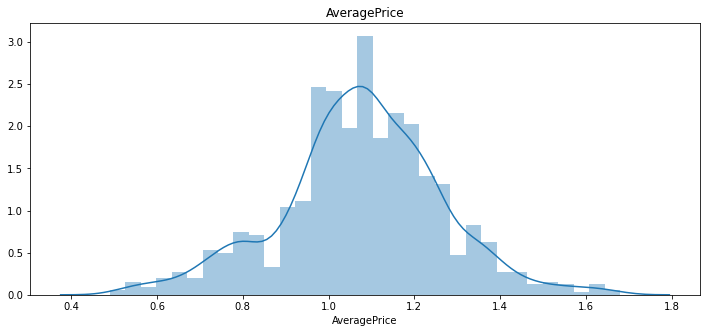

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("AveragePrice")
ax = sns.distplot(av1["AveragePrice"])

From the above plotting, it is evident that the price of each avacado is somewhere between 0.4 to 1.8

Most of the avacados are seen to be priced at 1.1/-(approx.)

In [57]:
av1.year.unique()

array([2015., 2016.])

#### Barplot

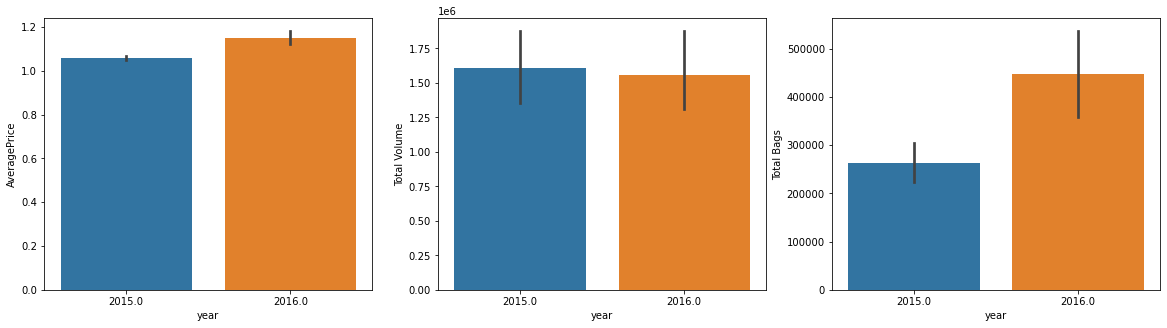

In [91]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.barplot(av1['year'],av1['AveragePrice'],ax=ax[0])
sns.barplot(y=av1['Total Volume'],x=av1['year'],ax=ax[1])
sns.barplot(y=av1['Total Bags'],x=av1['year'],ax=ax[2])

year-wise growth can be in 'AveragePrice' and 'TotalBags'. 'Total volume' seems to be in negative trend.

1) Average price is high in year 2016

2) Total Bags of avacados are sold high in 2016. Whereas in 2015, Total Volume of avacados are sold high.

In [54]:
#Let's check regions

av1.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

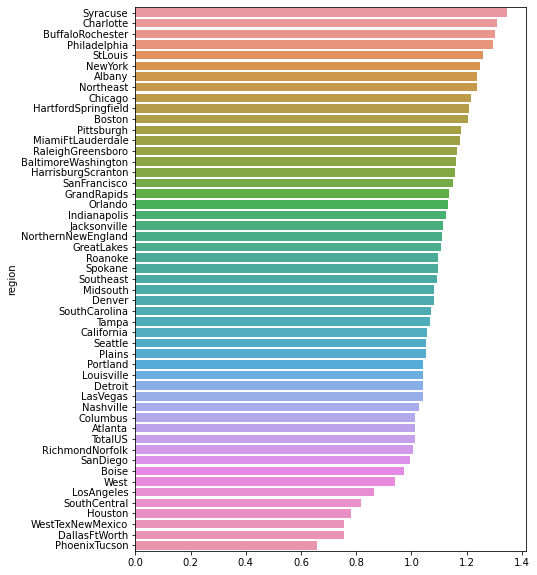

In [92]:
avg_pr=av1.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).values
loc=av1.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).index
plt.figure(figsize=(7,10))
sns.barplot(x=avg_pr,y=loc)

avg price is high in syracus,charlotte,BuffaloRochester. Whereas NewMexico, phoenix, Dallas have low avg price

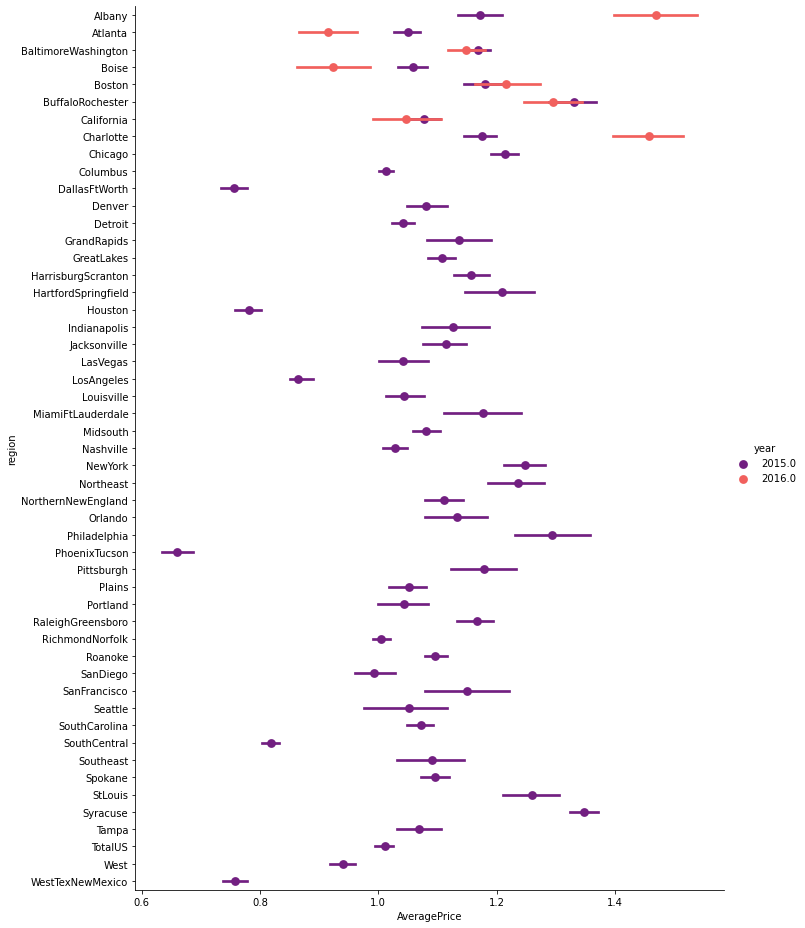

In [61]:
import warnings

price_per_year = sns.factorplot('AveragePrice', 'region', data= av1 , hue='year', size=13, aspect=0.8,palette='magma',join=False)

1) The regions like:
    
    'Albany'
    'Atlanta'
    'BaltimoreWashington'
    'Boise'
    'Boston'
    'BuffaloRochester'
    'California'
    'Charlott
    
are seen to have avacados selling from 0.8 to 1.5 price range in the years 2015-16

       
2)Rest of the countries seem to lack the seeling year 2016.

3) PhoenixTucson seem to have lowest price of 0.7(approx.)

### Let's split Date into Month, Day for easier understanding.

In [123]:
av1['Date']=pd.to_datetime(av1['Date'])

av1['month']=av1['Date'].dt.month
av1['day']=av1['Date'].dt.day

In [124]:
av1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,9,25


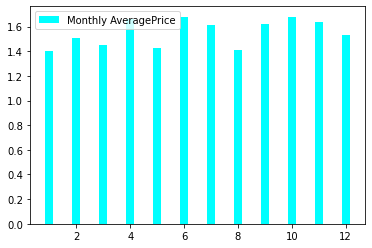

In [119]:
plt.bar(x=av1['month'],height=av1['AveragePrice'],width=0.3,color='cyan',label='Monthly AveragePrice')
plt.legend()

As the above visualization clearly conveys the monthly Average Pricing of Avacados.

1) 6th, 10th month seems to have higher Average Price.

2) 1st and 8th month have lower Average Price.

In [83]:
av1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Except 'AveragePrice', all the columns seems to have wide std and huge mean.

In [63]:
av1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


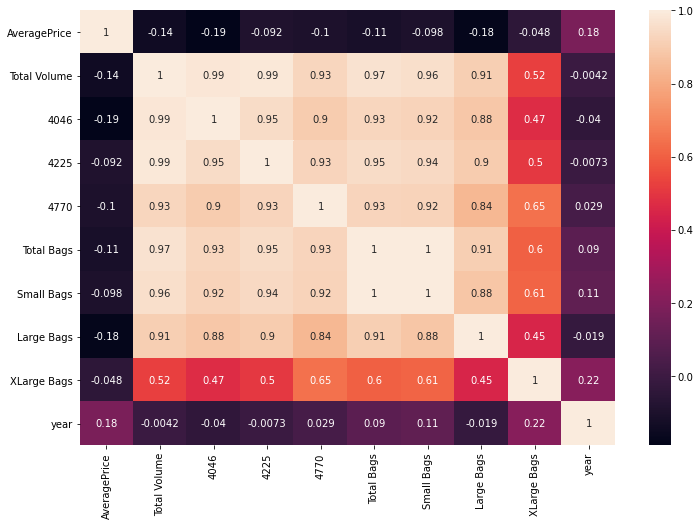

In [66]:
plt.figure(figsize = (12,8))
sns.heatmap(av1.corr(), annot = True)

'Type' column is object type. Though it only has 1 unique value, it doesn't affect the target. It can be dropped.

In [86]:
av1.drop(['type'], axis = 1, inplace = True)

In [127]:
av2 = av1.copy

In [129]:
av2 = av1[['Total Volume', 'Total Bags', 'year','region', 'month', 'day','AveragePrice']]

In [130]:
av2

,Total Volume,Total Bags,year,region,month,day,AveragePrice
0,64236.62,8696.87,2015.0,Albany,12,27,1.33
1,54876.98,9505.56,2015.0,Albany,12,20,1.35
2,118220.22,8145.35,2015.0,Albany,12,13,0.93
3,78992.15,5811.16,2015.0,Albany,6,12,1.08
4,51039.60,6183.95,2015.0,Albany,11,29,1.28
...,...,...,...,...,...,...,...
1512,190846.01,59418.46,2016.0,Charlotte,10,16,1.39
1513,178235.75,63300.70,2016.0,Charlotte,9,10,1.51
1514,178410.82,62415.77,2016.0,Charlotte,2,10,1.48
1515,189131.52,63931.73,2016.0,Charlotte,9,25,1.47


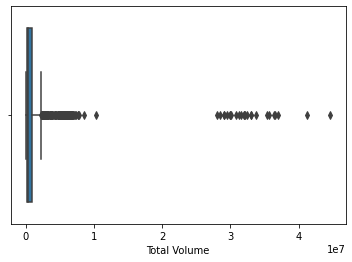

In [132]:
#lets check the distribution 

sns.boxplot(av2['Total Volume'])

In [133]:
#'Total Volume' has a lot of skewness 

print(av2['Total Volume'].skew())
print(av2['Total Bags'].skew())

#highly skewed , so using np.log

6.200137589769949
5.366378496698982


In [161]:
import warnings
warnings.filterwarnings('ignore')

av2['Total Volume'] = np.log1p(av2['Total Volume'])
av2['Total Bags'] = np.log1p(av2['Total Bags'])

In [139]:
print(av2['Total Volume'].skew())
print(av2['Total Bags'].skew())

0.38370399131471217
0.2743845228787502


In [141]:
av2.skew()

Total Volume    0.383704
Total Bags      0.274385
year            1.828332
month           0.101439
day             0.041303
AveragePrice   -0.109444
dtype: float64

In [142]:
av2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  1517 non-null   float64
 1   Total Bags    1517 non-null   float64
 2   year          1517 non-null   float64
 3   region        1517 non-null   object 
 4   month         1517 non-null   int64  
 5   day           1517 non-null   int64  
 6   AveragePrice  1517 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 134.8+ KB


In [143]:
av2

,Total Volume,Total Bags,year,region,month,day,AveragePrice
0,1.250117,1.196840,2015.0,Albany,12,27,1.33
1,1.246348,1.199493,2015.0,Albany,12,20,1.35
2,1.264141,1.194867,2015.0,Albany,12,13,0.93
3,1.254971,1.184420,2015.0,Albany,6,12,1.08
4,1.244591,1.186379,2015.0,Albany,11,29,1.28
...,...,...,...,...,...,...,...
1512,1.274559,1.248259,2016.0,Charlotte,10,16,1.39
1513,1.273102,1.249768,2016.0,Charlotte,9,10,1.51
1514,1.273123,1.249434,2016.0,Charlotte,2,10,1.48
1515,1.274367,1.250004,2016.0,Charlotte,9,25,1.47


In [168]:
#categorical Data

print(av2['region'].nunique())

51


There are 51 categorical values. It is converted into indicator variables or dummy.

In [ ]:
av2=pd.get_dummies(av2,drop_first=True,columns=['region'])

In [173]:
av2

,Total Volume,Total Bags,year,month,day,AveragePrice,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.810982,0.787020,2015.0,12,27,1.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.809306,0.788227,2015.0,12,20,1.35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.817195,0.786121,2015.0,12,13,0.93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.813137,0.781350,2015.0,6,12,1.08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.808523,0.782247,2015.0,11,29,1.28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0.821786,0.810156,2016.0,10,16,1.39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0.821145,0.810827,2016.0,9,10,1.51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0.821155,0.810678,2016.0,2,10,1.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0.821702,0.810932,2016.0,9,25,1.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
x=av2.drop('AveragePrice',axis=1)

y=av2['AveragePrice']

In [193]:
x

,Total Volume,Total Bags,year,month,day,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.810982,0.787020,2015.0,12,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.809306,0.788227,2015.0,12,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.817195,0.786121,2015.0,12,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.813137,0.781350,2015.0,6,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.808523,0.782247,2015.0,11,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0.821786,0.810156,2016.0,10,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0.821145,0.810827,2016.0,9,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0.821155,0.810678,2016.0,2,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0.821702,0.810932,2016.0,9,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [197]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [199]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)
print('R2_score ',r2_score(y_test,predict))
print('mae ',mean_absolute_error(y_test,predict))
print('rmse ',np.sqrt(mean_squared_error(y_test,predict)))

R2_score  0.7614474242732104
mae  0.06775656472114693
rmse  0.09149569709805393


In [200]:
#RandomForest

dt=RandomForestRegressor()

dt.fit(x_train,y_train)
predict=lr.predict(x_test)
print('R2_score ',r2_score(y_test,predict))
print('mae ',mean_absolute_error(y_test,predict))
print('mse ',mean_squared_error(y_test,predict))   

R2_score  0.7614474242732104
mae  0.06775656472114693
mse  0.008371462587458835


In [203]:
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
predict=lr.predict(x_test)
print('R2_score ',r2_score(y_test,predict))
print('mae ',mean_absolute_error(y_test,predict))
print('rmse ',np.sqrt(mean_squared_error(y_test,predict)))

R2_score  0.7614474242732104
mae  0.06775656472114693
rmse  0.09149569709805393


In [204]:
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [270]:
rand_grid={'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


dt_rs=DecisionTreeRegressor()

rv=RandomizedSearchCV(estimator=dt_rs,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                      n_iter=10,cv=3,random_state=31, n_jobs = 1)

In [271]:
rv.fit(x_train,y_train)

pred=rv.predict(x_test)
r2_score(y_test,pred)

0.7019016168980878

In [272]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [274]:
rf_rs=RandomForestRegressor()

rv=RandomizedSearchCV(estimator=rf_rs,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                      n_iter=10,cv=3,random_state=42, n_jobs = 1)
rv.fit(x_train,y_train)
pred=rv.predict(x_test)
print(r2_score(y_test,pred))

0.8031030041959712
